In [2]:
data_file_name = '/Users/Ethan/Developer/Projects/College/大四下/數據分析/期末/91APP_DataSet_2023'

In [3]:
from pathlib import Path
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
import sqlite3
from sqlalchemy import create_engine, MetaData, Table, Column, Integer, String
from sqlalchemy.orm import sessionmaker
import pandas as pd
from tqdm import tqdm

# create database
_ = sqlite3.connect('database.db')

# Define the SQLAlchemy engine and session
engine = create_engine('sqlite:///database.db')
Session = sessionmaker(bind=engine)
session = Session()

data_file_name = Path(data_file_name)

In [3]:
from sqlalchemy import Column, Integer, String, Float, Boolean, DateTime, PrimaryKeyConstraint, ForeignKey
from sqlalchemy.orm import declarative_base, relationship

Base = declarative_base()

class MemberData(Base):
    __tablename__ = 'MemberData'
    
    # Define columns
    ShopMemberId = Column(String, primary_key=True)
    RegisterSourceTypeDef = Column(String)
    RegisterDateTime = Column(DateTime)
    Gender = Column(String)
    Birthday = Column(DateTime)
    IsAppInstalled = Column(Boolean)
    IsEnableEmail = Column(Boolean)
    IsEnablePushNotification = Column(Boolean)
    IsEnableShortMessage = Column(Boolean)
    MemberCardLevel = Column(Integer)
    CountryAliasCode = Column(String)

class BehaviorData(Base):
    __tablename__ = 'BehaviorData'

    # Define columns
    id = Column(Integer, primary_key=True)
    Tunnel = Column(String)
    Device = Column(String)
    FullvisitorId = Column(String)
    DeviceId = Column(String)
    ShopMemberId = Column(String, ForeignKey('MemberData.ShopMemberId'))  # Foreign key relationship
    HitTime = Column(DateTime)
    Language = Column(String)
    CountryAliasCode = Column(String)
    Version = Column(String)
    UTMSource = Column(String)
    UTMMedium = Column(String)
    UTMName = Column(String)
    Behavior = Column(String)
    RegisterTunnel = Column(String)
    CategoryId = Column(String)
    SalePageId = Column(String)
    UnitPrice = Column(Float)
    Qty = Column(Float)
    TotalSalesAmount = Column(Float)
    CurrencyCode = Column(String)
    TradesGroupCode = Column(String)
    SearchTerm = Column(String)
    ContentType = Column(String)
    ContentName = Column(String)
    ContentId = Column(String)
    PageType = Column(String)
    EventTime = Column(DateTime)

    # Define primary key constraint
    __table_args__ = (
        PrimaryKeyConstraint('id'),
    )
    
    # Define the relationship to MemberData
    MemberData = relationship('MemberData', foreign_keys='BehaviorData.ShopMemberId')


    
# create tables
Base.metadata.create_all(engine)


In [4]:
data_types = {
    'ShopMemberId': str,
    'RegisterSourceTypeDef': str,
    'RegisterDateTime': str,
    'Gender': str,
    'Birthday': str,
    'APPRefereeId': str,
    'APPRefereeLocationId': str,
    'IsAppInstalled': bool,
    'IsEnableEmail': bool,
    'IsEnablePushNotification': bool,
    'IsEnableShortMessage': bool,
    'FirstAppOpenDateTime': str,
    'LastAppOpenDateTime': str,
    'MemberCardLevel': int,
    'CountryAliasCode': str,
    'FirstAppOpenDateTime': str,
    'LastAppOpenDateTime': str
    
}
df = pd.read_csv(data_file_name / 'MemberData.csv', dtype=data_types)
df['RegisterDateTime'] = pd.to_datetime(df['RegisterDateTime'], format='ISO8601')
df['Birthday'] = df['Birthday'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df = df.drop(columns=['APPRefereeId', 'APPRefereeLocationId', 'FirstAppOpenDateTime', 'LastAppOpenDateTime'])

In [8]:
records = []
for record in tqdm(df.to_dict(orient='records')):
    records.append(MemberData(**record))
    
session.add_all(records)
session.commit()

0

In [8]:
def get_member_df(file_name: [str, Path]) -> pd.DataFrame:
    data_types = {
        'ShopMemberId': str,
        'RegisterSourceTypeDef': str,
        'RegisterDateTime': str,
        'Gender': str,
        'Birthday': str,
        'APPRefereeId': str,
        'APPRefereeLocationId': str,
        'IsAppInstalled': bool,
        'IsEnableEmail': bool,
        'IsEnablePushNotification': bool,
        'IsEnableShortMessage': bool,
        'FirstAppOpenDateTime': str,
        'LastAppOpenDateTime': str,
        'MemberCardLevel': int,
        'CountryAliasCode': str,
        'FirstAppOpenDateTime': str,
        'LastAppOpenDateTime': str
        
    }
    df = pd.read_csv(data_file_name / 'MemberData.csv', dtype=data_types)
    df['RegisterDateTime'] = pd.to_datetime(df['RegisterDateTime'], format='ISO8601')
    df['Birthday'] = df['Birthday'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))
    df = df.drop(columns=['APPRefereeId', 'APPRefereeLocationId', 'FirstAppOpenDateTime', 'LastAppOpenDateTime'])
    return df

def get_behavior_df(file_name: [str, Path]) -> pd.DataFrame:
    """load behavior data from csv file and return a dataframe
    param: file_name: str or Path object
    """
    global data_file_name
    data_types = {
        'Tunnel': str,
        'Device': str,
        'FullvisitorId': str,
        'DeviceId': str,
        'ShopMemberId': str,
        'HitTime': int,
        'Language': str,
        'CountryAliasCode': str,
        'Version': str,
        'UTMSource': str,
        'UTMMedium': str,
        'UTMName': str,
        'Behavior': str,
        'RegisterTunnel': str,
        'CategoryId': str,
        'SalePageId': str,
        'UnitPrice': float,
        'Qty': float,
        'TotalSalesAmount': float,
        'CurrencyCode': str,
        'TradesGroupCode': str,
        'SearchTerm': str,
        'ContentType': str,
        'ContentName': str,
        'ContentId': str,
        'PageType': str,
        'EventTime': int
    }
    df = pd.read_csv(data_file_name / 'BehaviorData' / file_name, dtype=data_types)
    df['HitTime'] = pd.to_datetime(df['HitTime'], unit='ms')
    df['EventTime'] = pd.to_datetime(df['EventTime'], unit='ms')
    return df

df = get_behavior_df('BehaviorData_2022-12-01.csv')

In [7]:
chunk_size = 10_000  # Number of records to add in each chunk
records = []
for index, record in enumerate(tqdm(df.to_dict(orient='records'))):
    records.append(BehaviorData(**record))
    
    if (index + 1) % chunk_size == 0:
        session.add_all(records)
        session.commit()
        records = []  # Reset the records list after committing the chunk

# Add any remaining records
if records:
    session.add_all(records)
    session.commit()

100%|██████████| 6292023/6292023 [03:20<00:00, 31316.25it/s]


# Data research

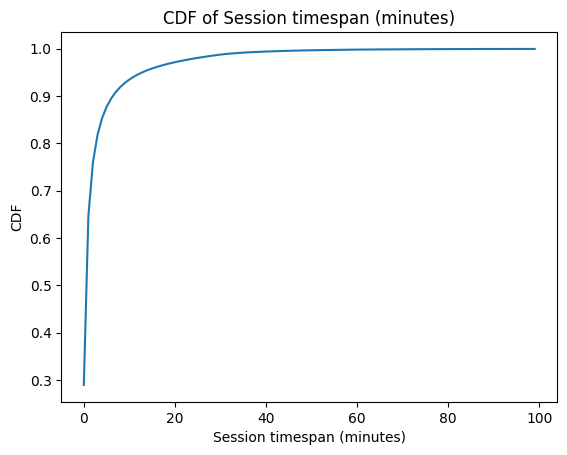

In [92]:
x, y = [], []
session_time = df.groupby(['FullvisitorId', 'HitTime']).agg({'EventTime': lambda x: x.max() - x.min()})
total = session_size.count()
for i in range(0, 100):
    x.append(i)
    y.append((session_time <= timedelta(minutes=i)).sum() / total)
plt.title('CDF of Session timespan (minutes)')
plt.ylabel('CDF')
plt.xlabel('Session timespan (minutes)')
plt.plot(x, y)
plt.show()

In [56]:
session_size = df.groupby(['FullvisitorId', 'HitTime']).size()
total = session_size.count()

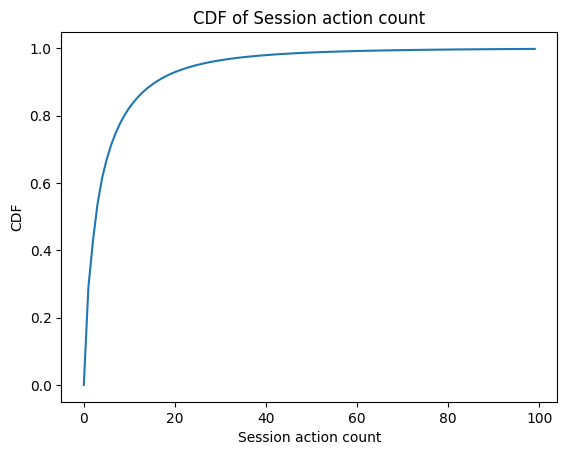

In [71]:
x, y = [], []
session_size = df.groupby(['FullvisitorId', 'HitTime']).size()
total = session_size.count()
for i in range(0, 100):
    x.append(i)
    y.append((session_size <= i).sum() / total)
plt.title('CDF of Session action count')
plt.ylabel('CDF')
plt.xlabel('Session action count')
plt.plot(x, y)
plt.show()

In [72]:
df.groupby(['FullvisitorId']).size()

FullvisitorId
+++LSTmx5GYB7Bb/STNwnloUtSzHfTT8BqtNjgAmW3CyddhSZyQHmKsxPbEnddad      1
+++VZPESPLvKDyhBO9mR3uq2sP7/iUCFak8l/bg2ONNEOA1xeFIg1V60suRdomlb      2
+++c4GdFQqxd+ZG6XcrdQMZxKwWx3avWB8NB/5oSyOeT4F+rPmiE/b/AI88Aa7t1      1
++0TAWLrhMSbd/fI8td3tLrHHk84RMX/fmy3QYGSeX6y8dI5DBBYsfutxAUURvNB      3
++0mLBg6hKATnG/3PV7Ad1a/klzftg6i2OWcZX6q94fFjr1/Tr37hYfLStbNe5FO      3
                                                                   ... 
zzxpE1gA5Z/8CalLufbnqR9U0/OD3wB66hbvFJXdbvNWKK89gHrNVrzaytpojpzw     24
zzyw86e2SvSEat8RMCKjSYgRQq29bBy10I9dGRDyBNqy7XJ7BQ0avSfnUqPk0sHj     26
zzzDvMiVpirPUgFhLIkFQqCJdhL/gmEIarLdKCoSiWl2Vo//w7QfyLUbUZ/vBLwL    111
zzzoSixfL2JR9NoijTmhdrixrNxR48n+zRRmvCDVXSy6oOmugZq7aDqPEJoMFwYu      1
zzzy7pDThZq3S7f2+wuDqExGkcRiqkOThzLALqapli3AKHLaPYOrv47lh/O+Q+hU     46
Length: 417649, dtype: int64

In [73]:
nuniq = df.groupby('ShopMemberId')['FullvisitorId'].nunique()

In [74]:
null_percentage = (df['ShopMemberId'].isnull().sum() / len(df)) * 100
member_df = df[df['ShopMemberId'].isnull()]

28 percent of session only have 1 action
